In [21]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import transforms, datasets

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
USE_CUDA = torch.cuda.is_available()
DEVICE = torch.device("cuda" if USE_CUDA else "cpu")
print(DEVICE)

cuda


In [23]:
EPOCHS = 50
BATCH_SIZE = 64

In [24]:
transform = transforms.Compose(
    [transforms.ToTensor()]
)
trainset = datasets.CIFAR100 (
    root='.data/',
    train=True,
    download  = True,
    transform = transform
)
testset = datasets.CIFAR100 (
    root='.data/',
    train=False,
    download  = True,
    transform = transform
)

Files already downloaded and verified
Files already downloaded and verified


In [25]:
train_loader = torch.utils.data.DataLoader(
    dataset= trainset,
    batch_size=BATCH_SIZE,
    shuffle=True,
)
test_loader = torch.utils.data.DataLoader(
    dataset     = testset,
    batch_size  = BATCH_SIZE,
    shuffle     = True,
)

In [26]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(3072, 784)
        self.fc2 = nn.Linear(784, 256)
        self.fc3 = nn.Linear(256, 100)

    def forward(self, x):
        x = x.view(-1, 3072)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


In [27]:
model = Net().to(DEVICE)
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [28]:
def train(model, train_loader, optimizer):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(DEVICE), target.to(DEVICE)
        optimizer.zero_grad()
        output = model(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer.step()

In [29]:
def evaluate(model, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(DEVICE), target.to(DEVICE)
            output = model(data)

            # 모든 오차 더하기
            test_loss += F.cross_entropy(output, target, reduction='sum').item()
            
            # 가장 큰 값을 가진 클래스가 모델의 예측입니다.
            # 예측과 정답을 비교하여 일치할 경우 correct에 1을 더합니다.
            pred = output.max(1, keepdim=True)[1]
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    test_accuracy = 100. * correct / len(test_loader.dataset)
    return test_loss, test_accuracy


In [30]:
loss = []
accuracy = []

In [31]:
for epoch in range(1, EPOCHS+1):
    train(model, train_loader, optimizer)
    test_loss, test_accuracy = evaluate(model, test_loader)
    loss.append(test_loss)
    accuracy.append(test_accuracy)

    print('[{}] Test Loss: {:.4f}, Accuracy: {:.2f}%'.format(epoch, test_loss, test_accuracy))

[1] Test Loss: 4.5153, Accuracy: 3.67%
[2] Test Loss: 4.2085, Accuracy: 7.11%
[3] Test Loss: 4.0772, Accuracy: 7.88%
[4] Test Loss: 4.0128, Accuracy: 8.49%
[5] Test Loss: 3.9014, Accuracy: 11.38%
[6] Test Loss: 3.8421, Accuracy: 12.29%
[7] Test Loss: 3.7877, Accuracy: 13.23%
[8] Test Loss: 3.7623, Accuracy: 13.06%
[9] Test Loss: 3.7055, Accuracy: 14.50%
[10] Test Loss: 3.6697, Accuracy: 15.15%
[11] Test Loss: 3.6446, Accuracy: 15.71%
[12] Test Loss: 3.6139, Accuracy: 16.27%
[13] Test Loss: 3.5920, Accuracy: 16.35%
[14] Test Loss: 3.5634, Accuracy: 17.22%
[15] Test Loss: 3.5662, Accuracy: 17.16%
[16] Test Loss: 3.5373, Accuracy: 18.10%
[17] Test Loss: 3.5432, Accuracy: 17.23%
[18] Test Loss: 3.4929, Accuracy: 18.15%
[19] Test Loss: 3.4758, Accuracy: 18.84%
[20] Test Loss: 3.4881, Accuracy: 18.09%
[21] Test Loss: 3.4424, Accuracy: 19.21%
[22] Test Loss: 3.4159, Accuracy: 19.89%
[23] Test Loss: 3.4275, Accuracy: 20.12%
[24] Test Loss: 3.4297, Accuracy: 19.69%
[25] Test Loss: 3.4035, Accur

In [32]:
PATH = './.models/DNN_Model.pt'

In [33]:
# saving model
torch.save(model.state_dict(), PATH)

In [34]:
print(loss)

[4.51529102859497, 4.2085203948974605, 4.0771524040222165, 4.012838562011718, 3.901380084228516, 3.8421032157897947, 3.7877347770690917, 3.762313816833496, 3.705471928024292, 3.669711944580078, 3.644649810409546, 3.6138675952911377, 3.5919761360168456, 3.563356051635742, 3.566159656524658, 3.5372934627532957, 3.5432401943206786, 3.492866879272461, 3.475754800415039, 3.4880952033996584, 3.4423693313598633, 3.4158617652893066, 3.427547585296631, 3.429698875427246, 3.4034695156097414, 3.3751921154022217, 3.3560361030578614, 3.3591995151519773, 3.3251876037597654, 3.311698302078247, 3.3121246627807617, 3.3221975635528564, 3.2675737056732177, 3.29601081199646, 3.27797653503418, 3.265970623779297, 3.258792682266235, 3.2840429344177244, 3.2492514362335205, 3.3177065013885496, 3.3218946475982665, 3.256509725189209, 3.2967486289978027, 3.230488187789917, 3.2548710960388183, 3.278485707092285, 3.26455599899292, 3.1730505016326904, 3.222980643081665, 3.2766635845184324]


In [35]:
print(accuracy)

[3.67, 7.11, 7.88, 8.49, 11.38, 12.29, 13.23, 13.06, 14.5, 15.15, 15.71, 16.27, 16.35, 17.22, 17.16, 18.1, 17.23, 18.15, 18.84, 18.09, 19.21, 19.89, 20.12, 19.69, 20.28, 20.35, 21.27, 20.37, 20.95, 21.67, 21.77, 21.43, 22.92, 21.76, 22.3, 22.67, 22.81, 22.28, 22.58, 21.45, 21.59, 23.23, 22.14, 23.3, 23.16, 23.07, 22.81, 24.5, 24.1, 23.05]


In [36]:
loss = np.array(loss)
print(loss)
accuracy = np.array(accuracy)
print(accuracy)
epochs = np.array([x for x in range(1, EPOCHS + 1)])

[4.51529103 4.20852039 4.0771524  4.01283856 3.90138008 3.84210322
 3.78773478 3.76231382 3.70547193 3.66971194 3.64464981 3.6138676
 3.59197614 3.56335605 3.56615966 3.53729346 3.54324019 3.49286688
 3.4757548  3.4880952  3.44236933 3.41586177 3.42754759 3.42969888
 3.40346952 3.37519212 3.3560361  3.35919952 3.3251876  3.3116983
 3.31212466 3.32219756 3.26757371 3.29601081 3.27797654 3.26597062
 3.25879268 3.28404293 3.24925144 3.3177065  3.32189465 3.25650973
 3.29674863 3.23048819 3.2548711  3.27848571 3.264556   3.1730505
 3.22298064 3.27666358]
[ 3.67  7.11  7.88  8.49 11.38 12.29 13.23 13.06 14.5  15.15 15.71 16.27
 16.35 17.22 17.16 18.1  17.23 18.15 18.84 18.09 19.21 19.89 20.12 19.69
 20.28 20.35 21.27 20.37 20.95 21.67 21.77 21.43 22.92 21.76 22.3  22.67
 22.81 22.28 22.58 21.45 21.59 23.23 22.14 23.3  23.16 23.07 22.81 24.5
 24.1  23.05]


In [37]:
df = pd.DataFrame({'epoch': epochs,
                   'loss': loss,
                   'accuracy': accuracy})
df.to_csv(".result/DNN_result.csv", index=False)

Text(0, 0.5, 'Accuracy')

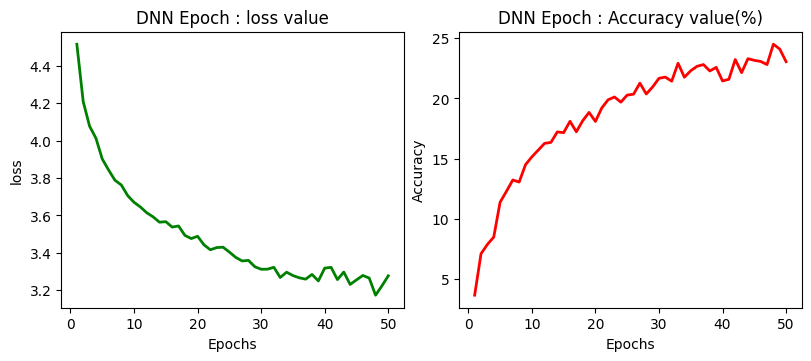

In [39]:
fig, axs = plt.subplots(ncols=2, figsize=(8, 3.5), layout="constrained")

axs[0].plot(epochs, loss, c='g', linewidth=2)
axs[0].set_title('DNN Epoch : loss value')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('loss')

axs[1].plot(epochs, accuracy, c='r', linewidth=2)
axs[1].set_title('DNN Epoch : Accuracy value(%)')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')